In [4]:
import pandas as pd

In [5]:
def process_row(row):
    language = row[:row.index(':')]
    lexeme = row[row.index(':')+1:row.index('<')]
    tags = row[row.index('<'):row.rindex('>')+1]
    separated_tags = []
    start, end = 0, 0
    while '<' in tags[start:]:
        end = tags.index('>', start)
        separated_tags.append(tags[start+1:end])
        start = end+1
    weight = float(row[row.index('\t')+1:])
    
    return (language, lexeme, separated_tags, weight)

In [6]:
with open("halflife-regression/results/hlr.settles.acl16.learning_traces.13m.weights") as f:
    data = f.read().split("\n")[:-1]

# First three entries are meta information
data = data[3:]
    
data = list(map(process_row, data))
df = pd.DataFrame(data, columns=("language", "lexeme", "tags", "weight"))
print(len(df))
df.head()

19279


,language,lexeme,tags,weight
0,es,desde/desde,[pr],0.1707
1,es,como/comer,"[vblex, pri, p1, sg]",0.1708
2,de,kinder/kind,"[n, nt, pl, nom]",0.1297
3,en,strawberry/strawberry,"[n, sg]",-0.0585
4,en,to/to,[pr],0.0324


<AxesSubplot:>

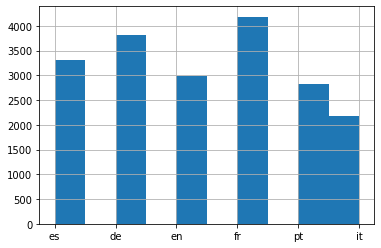

In [7]:
df.language.hist()

In [8]:
df.groupby("language").weight.mean()

language
de    0.090193
en    0.214363
es    0.221441
fr    0.115161
it    0.077891
pt    0.074846
Name: weight, dtype: float64

<AxesSubplot:>

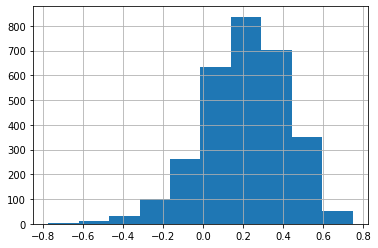

In [10]:
df[df.language == "en"].weight.hist()

In [11]:
df.lexeme.nunique()

10703

In [12]:
!wc -l halflife-regression/results/hlr.settles.acl16.learning_traces.13m.weights

   19282 halflife-regression/results/hlr.settles.acl16.learning_traces.13m.weights


In [13]:
!head halflife-regression/results/hlr.settles.acl16.learning_traces.13m.weights

right	0.0128
wrong	-0.1807
bias	7.3535
es:desde/desde<pr>	0.1707
es:como/comer<vblex><pri><p1><sg>	0.1708
de:kinder/kind<n><nt><pl><nom>	0.1297
en:strawberry/strawberry<n><sg>	-0.0585
en:to/to<pr>	0.0324
en:am/be<vbser><pri><p1><sg>	-0.0578
en:on/on<pr>	0.1622
